In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
%matplotlib inline

In [60]:
transactions = pd.read_csv("exp01.csv",skiprows=1,sep=";")

In [61]:
transactions.describe()

,time,transaction,price,volume
count,26393.000000,26393.000000,26393.000000,26393.000000
mean,25082.522032,13197.000000,145.002001,45.693366
std,14396.123183,7619.147164,6.489601,28.578351
min,1.000000,1.000000,56.230000,1.000000
25%,12768.000000,6599.000000,143.610000,21.000000
50%,25035.000000,13197.000000,146.840000,44.000000
75%,37537.000000,19795.000000,148.770000,69.000000
max,49999.000000,26393.000000,150.000000,100.000000


In [62]:
#Convert time to days
transactions.loc[:,'time'] //= 200

In [63]:
df = transactions[['time','price','volume']]

In [64]:
#Convert it to "long-form" or "tidy" representation
df = pd.melt(df, id_vars=["time"], var_name="condition")

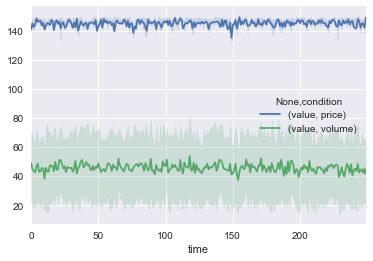

In [65]:
# Plot the average value by condition and date
ax = df.groupby(["condition", "time"]).mean().unstack("condition").plot()
# Get a reference to the x-points corresponding to the dates and the the colors
x = np.arange(len(df.time.unique()))
palette = sns.color_palette()

# Calculate the 25th and 75th percentiles of the data
# and plot a translucent band between them
for cond, cond_df in df.groupby("condition"):
    low = cond_df.groupby("time").value.apply(np.percentile, 25)
    high = cond_df.groupby("time").value.apply(np.percentile, 75)
    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))
